In [1]:
import pandas as pd
import cv2
from src.dataset import CropsDataset, ObjectDetectorDataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder
from src.utils import collate_fn
from matplotlib import pyplot as plt

In [2]:
le = LabelEncoder()
le.fit(['human-ride-bicycle', 'human-walk-bicycle', 'human-hold-bicycle', 'human-ride-motorcycle', 'human-walk-motorcycle'])
# dataset = CropsDataset(anno_file=r'data\crops_data\annotations_hoi_frame.csv', img_dir = r'data\crops_data', label_encoder=le)


In [3]:
print(dataset.img_files)

['data\\crops_data\\20200514\\clip_10_1744\\frame_0094.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0095.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0096.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0097.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0098.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0099.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0100.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0101.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0102.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0103.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0104.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0105.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0106.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0107.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0111.jpg', 'data\\crops_data\\20200514\\clip_10_1744\\frame_0112.jpg', 'data\\crops_data\\20200514\\clip_10_17

In [217]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, collate_fn=collate_fn)

['human-ride-bicycle']


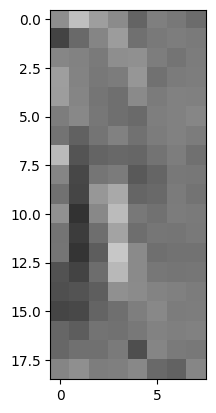

In [189]:
image, target = next(iter(dataloader))
plt.imshow(image[0].numpy().transpose(1, 2 , 0))
print(le.inverse_transform(target[0].numpy()))


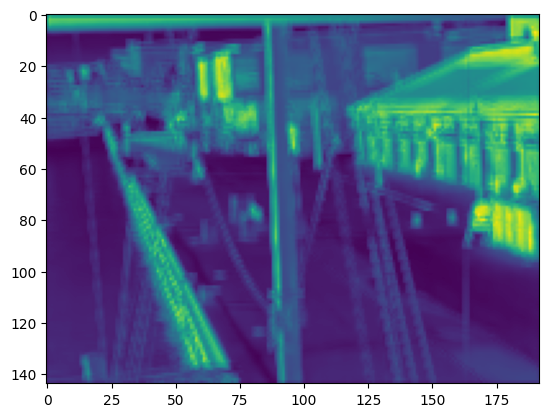

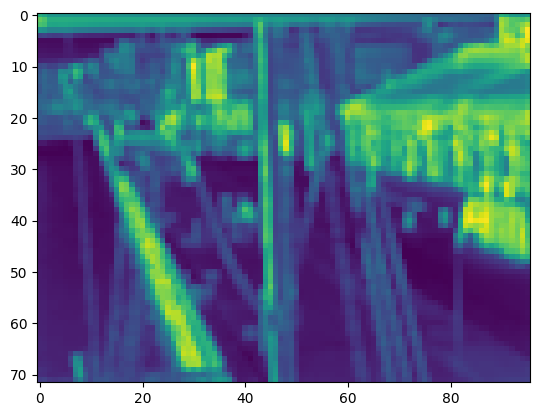

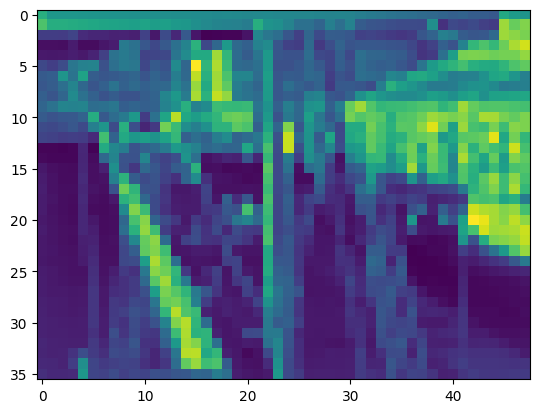

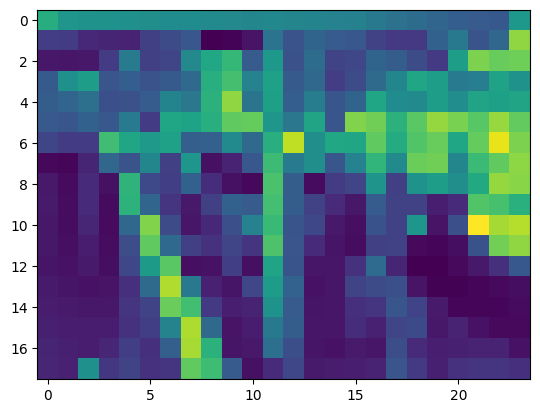

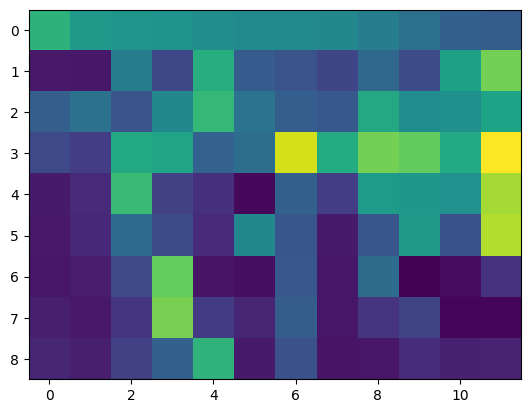

In [57]:
import timm
import torch
model = timm.create_model('resnet50', num_classes = 5, features_only = True)
model.eval()
image = cv2.imread('data/data_inter/clips/20200518/clip_15_0659/frame_0009.jpg').astype(float)/255
image = image.transpose((2, 0, 1))
image = torch.tensor(image).type(torch.float)
out = model(image.unsqueeze(0))
for o in out:

    plt.imshow(o[0].transpose(0,2).sum(-1).transpose(0,1).detach().numpy())
    plt.show()

# for image, target in dataloader:
#     
#     plt.imshow(test[0].transpose(0,2).sum(-1).detach().numpy())
#     break
#     plt.imshow(test)
#     plt.show()
